In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import gc
import psutil
import os

%matplotlib inline
print(os.listdir("../inputs"))

def show_ram_usage():
    py = psutil.Process(os.getpid())
    print('RAM usage: {} GB'.format(py.memory_info()[0]/2. ** 30))
show_ram_usage()

['test.csv', 'train.csv', 'potential_energy.csv', 'magnetic_shielding_tensors.csv', 'scalar_coupling_contributions.csv', 'sample_submission.csv', 'mulliken_charges.csv', 'structures.csv', 'dipole_moments.csv', 'structures']
RAM usage: 0.11565017700195312 GB


In [2]:
train_dtypes = {
    'molecule_name': 'category',
    'atom_index_0': 'int8',
    'atom_index_1': 'int8',
    'type': 'category',
    'scalar_coupling_constant': 'float32'
}
# Load the data
train = pd.read_csv('../inputs/train.csv', index_col='id', dtype=train_dtypes)
#test = pd.read_csv('../inputs/test.csv', index_col='id')
G1_train = np.float32(np.load('G1_array_train.npy'))
rb_train = np.float32(np.load('rb_train.npy'))

#print(display(train.head(), test.head()))
print(display(train.head()))
#-----------------------------------------------------------------
print(f'There are {train.shape[0]} rows in train data.')
#print(f'There are {test.shape[0]} rows in test data.')
print('')
print(f'There are {G1_train.shape[0]} rows in G1_train data.')
print(f'There are {G1_train.shape[1]} features in each G1_train row.')
print(f'There are {len(rb_train)} rows in rb_train data.')
print('')
# ---------------------------------------------------------------
show_ram_usage()

/home/sher/anaconda2/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
id,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.807602
1,dsgdb9nsd_000001,1,2,2JHH,-11.257000
2,dsgdb9nsd_000001,1,3,2JHH,-11.254800
3,dsgdb9nsd_000001,1,4,2JHH,-11.254300
4,dsgdb9nsd_000001,2,0,1JHC,84.807404


None
There are 4658147 rows in train data.

There are 4658147 rows in G1_train data.
There are 80 features in each G1_train row.
There are 4658147 rows in rb_train data.

RAM usage: 1.6591873168945312 GB


In [3]:
# Now we add to the train file
train['rb'] = rb_train
for i in range(80):
    train[f'g1_{i}'] = G1_train[:, i]
print(display(train.head()))
# ---------------------------------------------------------------
show_ram_usage()
del rb_train, G1_train
gc.collect()
# ---------------------------------------------------------------
show_ram_usage()

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,rb,g1_0,g1_1,g1_2,g1_3,...,g1_70,g1_71,g1_72,g1_73,g1_74,g1_75,g1_76,g1_77,g1_78,g1_79
id,,,,,,,,,,,,,,,,,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.807602,1.091953,0.012507,0.000000,0.0,0.0,...,2.005144,0.000000,0.0,0.0,0.0,1.796993,0.000000,0.0,0.0,0.0
1,dsgdb9nsd_000001,1,2,2JHH,-11.257000,1.783120,0.066349,0.279369,0.0,0.0,...,1.518414,0.845837,0.0,0.0,0.0,1.335081,0.723431,0.0,0.0,0.0
2,dsgdb9nsd_000001,1,3,2JHH,-11.254800,1.783147,0.066351,0.279371,0.0,0.0,...,1.518416,0.845837,0.0,0.0,0.0,1.335083,0.723431,0.0,0.0,0.0
3,dsgdb9nsd_000001,1,4,2JHH,-11.254300,1.783157,0.066352,0.279371,0.0,0.0,...,1.518418,0.845837,0.0,0.0,0.0,1.335084,0.723431,0.0,0.0,0.0
4,dsgdb9nsd_000001,2,0,1JHC,84.807404,1.091952,0.012507,0.000000,0.0,0.0,...,2.005140,0.000000,0.0,0.0,0.0,1.796990,0.000000,0.0,0.0,0.0


None
RAM usage: 3.0650596618652344 GB
RAM usage: 1.6771583557128906 GB


In [4]:
%%time
def build_type_dataframe(base, coupling_type):
    base = base[base['type'] == coupling_type].drop('type', axis=1).copy()
    base = base.drop(['atom_index_0', 'atom_index_1', 'molecule_name'], axis=1)
    return base

train_1JHNN = build_type_dataframe(train, '1JHN')
print(train_1JHNN.shape)
print(display(train_1JHNN.head()))
# ---------------------------------------------------------------
show_ram_usage()

(43363, 82)


,scalar_coupling_constant,rb,g1_0,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,...,g1_70,g1_71,g1_72,g1_73,g1_74,g1_75,g1_76,g1_77,g1_78,g1_79
id,,,,,,,,,,,,,,,,,,,,,
10,32.688900,1.017190,0.038371,0.000000,0.0,0.00000,0.0,1.525880,0.000000,0.0,...,1.470523,0.000000,0.0,0.000000,0.0,1.300110,0.000000,0.0,0.000000,0.0
13,32.689098,1.017187,0.038372,0.000000,0.0,0.00000,0.0,1.525881,0.000000,0.0,...,1.470526,0.000000,0.0,0.000000,0.0,1.300111,0.000000,0.0,0.000000,0.0
15,32.690498,1.017208,0.038317,0.000000,0.0,0.00000,0.0,1.525813,0.000000,0.0,...,1.470400,0.000000,0.0,0.000000,0.0,1.300019,0.000000,0.0,0.000000,0.0
97,55.525200,1.007511,0.000449,0.000035,0.0,0.00073,0.0,0.368801,0.147286,0.0,...,0.573812,0.473818,0.0,0.593966,0.0,0.522914,0.438875,0.0,0.539437,0.0
101,54.735901,1.004933,0.003604,0.000008,0.0,0.00000,0.0,0.980439,0.078727,0.0,...,1.230396,0.420622,0.0,0.000000,0.0,1.112649,0.392914,0.0,0.000000,0.0


None
RAM usage: 1.74652099609375 GB
CPU times: user 2.93 s, sys: 1.49 s, total: 4.42 s
Wall time: 1.11 s


In [5]:
# Now we will train these values and use lightGBM to train
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_absolute_error

X_data = train_1JHNN.drop(['scalar_coupling_constant'], axis=1).values.astype('float32')
y_data = train_1JHNN['scalar_coupling_constant'].values.astype('float32')

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=128)
X_train.shape, X_val.shape, y_train.shape, y_val.shape
# ---------------------------------------------------------------
show_ram_usage()

RAM usage: 1.7727699279785156 GB


In [6]:
from lightgbm import LGBMRegressor
LGB_PARAMS = {
    'objective': 'regression',
    'metric': 'mae',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'learning_rate': 0.2,
    'num_leaves': 128,
    'min_child_samples': 79,
    'max_depth': 9,
    'subsample_freq': 1,
    'subsample': 0.9,
    'bagging_seed': 11,
    'reg_alpha': 0.1,
    'reg_lambda': 0.3,
    'colsample_bytree': 1.0
}


model = LGBMRegressor(**LGB_PARAMS, n_estimators=1500, n_jobs = -1)
model.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_val, y_val)], eval_metric='mae',
        verbose=100, early_stopping_rounds=200)
print('')
print('Model fit!')
print('')
# ---------------------------------------------------------------
show_ram_usage()

y_pred = model.predict(X_val)
np.log(mean_absolute_error(y_val, y_pred))

Training until validation scores don't improve for 200 rounds.
[100]	training's l1: 0.736442	valid_1's l1: 0.946088
[200]	training's l1: 0.627824	valid_1's l1: 0.890957
[300]	training's l1: 0.554505	valid_1's l1: 0.864955
[400]	training's l1: 0.495769	valid_1's l1: 0.846044
[500]	training's l1: 0.44429	valid_1's l1: 0.829996
[600]	training's l1: 0.400336	valid_1's l1: 0.81718
[700]	training's l1: 0.362681	valid_1's l1: 0.807532
[800]	training's l1: 0.331237	valid_1's l1: 0.801528
[900]	training's l1: 0.303795	valid_1's l1: 0.795801
[1000]	training's l1: 0.279986	valid_1's l1: 0.791115
[1100]	training's l1: 0.258887	valid_1's l1: 0.786953
[1200]	training's l1: 0.24156	valid_1's l1: 0.783686
[1300]	training's l1: 0.22564	valid_1's l1: 0.780579
[1400]	training's l1: 0.210661	valid_1's l1: 0.778266
[1500]	training's l1: 0.198023	valid_1's l1: 0.775594
Did not meet early stopping. Best iteration is:
[1500]	training's l1: 0.198023	valid_1's l1: 0.775594

Model fit!

RAM usage: 1.830905914306

-0.2541255204003367

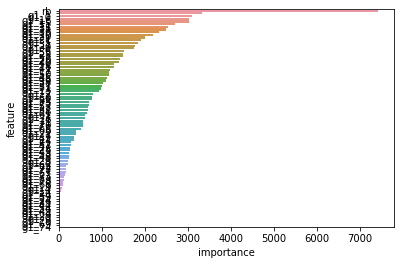

In [7]:
import seaborn as sns
cols = list(train_1JHNN.columns)
cols.remove('scalar_coupling_constant')
cols
df_importance = pd.DataFrame({'feature': cols, 'importance': model.feature_importances_})
sns.barplot(x="importance", y="feature", data=df_importance.sort_values('importance', ascending=False))